# 📊 COVID-19 India Data Analysis with Python & SQL

## 🧹 1. Data Cleaning

In [ ]:

import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:


# Replace this path with the actual path to your file
file_path = '/content/drive/MyDrive/covid_19_india.csv'

df = pd.read_csv(file_path)
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [10]:
# Rename columns
df.rename(columns={
    'Date': 'date',
    'State/UnionTerritory': 'state_ut',
    'Cured': 'cured',
    'Deaths': 'deaths',
    'Confirmed': 'confirmed'
}, inplace=True)


In [12]:
# Convert date format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')
# Updated format to match YYYY-MM-DD
# errors='coerce' will handle any dates that still don't match by setting them to NaT (Not a Time)

In [13]:
# Fill missing values
df.fillna(0, inplace=True)

In [14]:
# Subset data
df = df[['date', 'state_ut', 'confirmed', 'cured', 'deaths']]
df.head()

,date,state_ut,confirmed,cured,deaths
0,2020-01-30,Kerala,1,0,0
1,2020-01-31,Kerala,1,0,0
2,2020-02-01,Kerala,2,0,0
3,2020-02-02,Kerala,3,0,0
4,2020-02-03,Kerala,3,0,0


## 🏗️ 2. Feature Engineering

In [15]:

df = df.sort_values(['state_ut', 'date'])


In [16]:
df['new_cases'] = df.groupby('state_ut')['confirmed'].diff().fillna(0).astype(int)

In [17]:
df['active_cases'] = df['confirmed'] - df['cured'] - df['deaths']

In [18]:
df['mortality_rate'] = (df['deaths'] / df['confirmed']).replace([float('inf'), -float('inf')], 0).fillna(0) * 100

In [19]:
df['recovery_rate'] = (df['cured'] / df['confirmed']).replace([float('inf'), -float('inf')], 0).fillna(0) * 100

In [20]:
df.head()

,date,state_ut,confirmed,cured,deaths,new_cases,active_cases,mortality_rate,recovery_rate
365,2020-03-26,Andaman and Nicobar Islands,1,0,0,0,1,0.0,0.0
392,2020-03-27,Andaman and Nicobar Islands,1,0,0,0,1,0.0,0.0
420,2020-03-28,Andaman and Nicobar Islands,6,0,0,5,6,0.0,0.0
447,2020-03-29,Andaman and Nicobar Islands,9,0,0,3,9,0.0,0.0
474,2020-03-30,Andaman and Nicobar Islands,9,0,0,0,9,0.0,0.0


## 📈 3. Exploratory Data Analysis

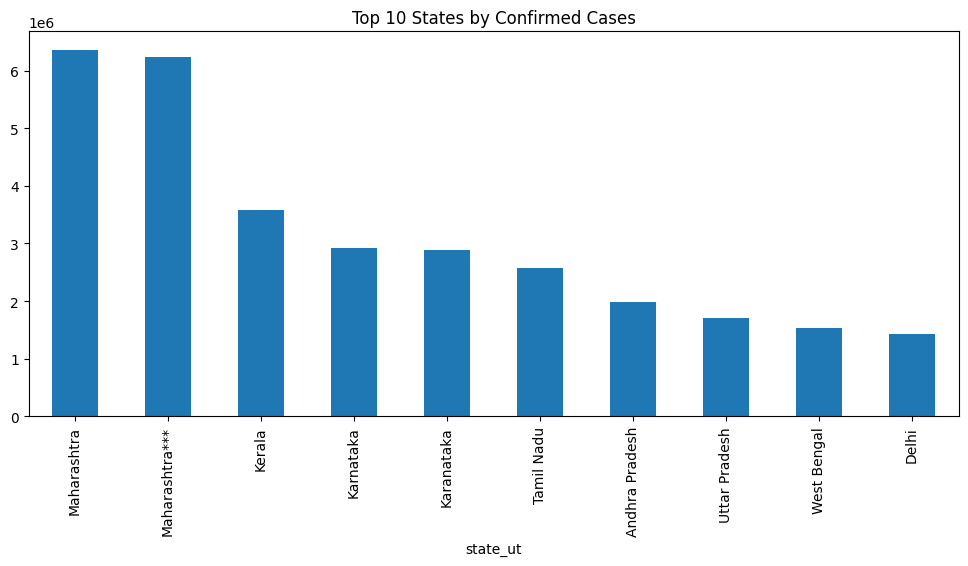

In [21]:

import matplotlib.pyplot as plt

# Top 10 states by confirmed cases
top_states = df.groupby('state_ut')['confirmed'].max().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', figsize=(12, 5), title="Top 10 States by Confirmed Cases")
plt.show()


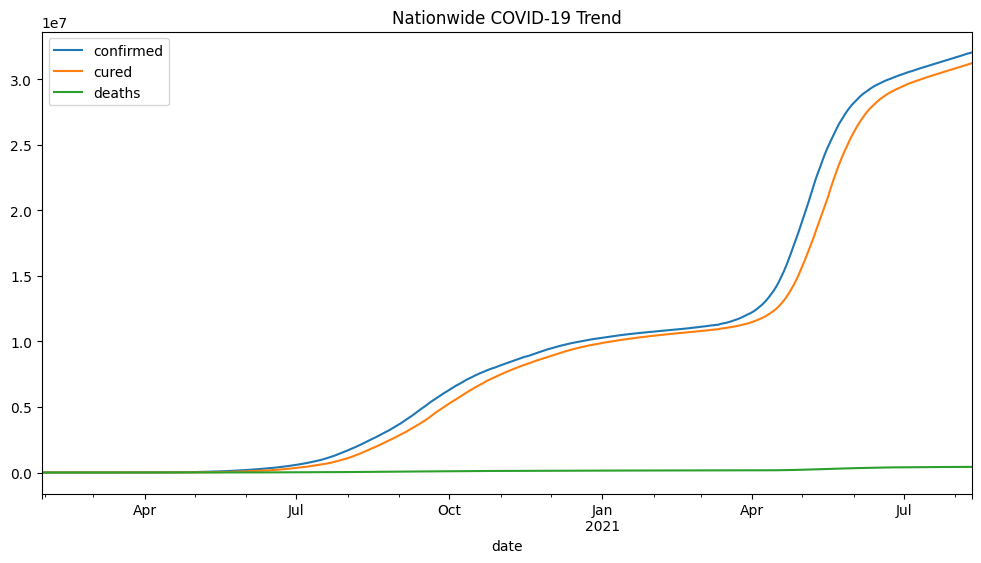

In [22]:

# Daily trend for India
daily_trend = df.groupby('date')[['confirmed', 'cured', 'deaths']].sum()
daily_trend.plot(title="Nationwide COVID-19 Trend", figsize=(12, 6))
plt.show()


## 🔍 4. Advanced Exploratory Data Analysis

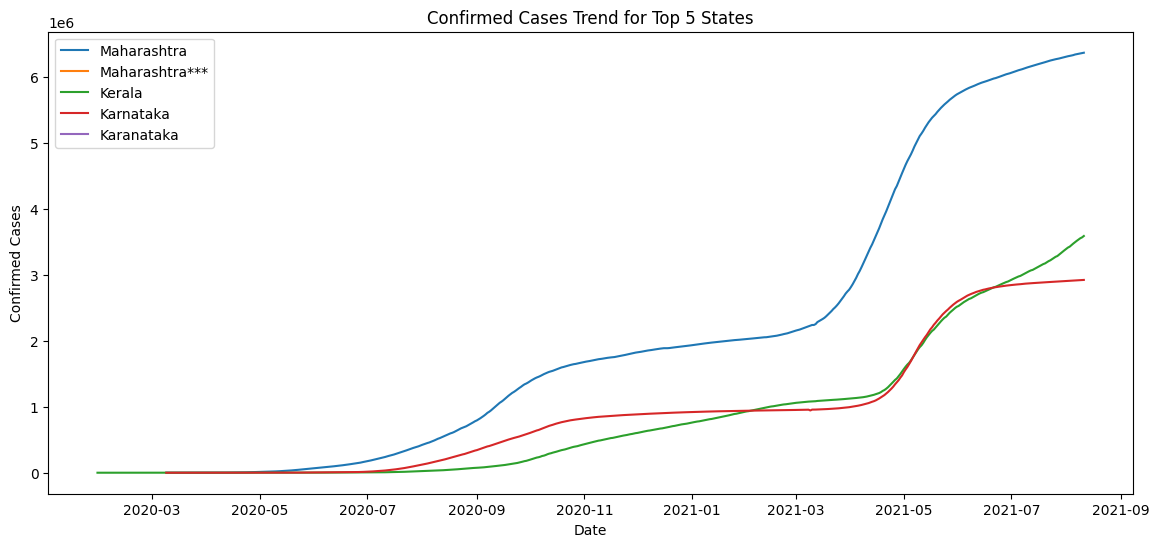

In [25]:

# Case trend over time for a few states
top_states_names = top_states.index.tolist()
plt.figure(figsize=(14, 6))
for state in top_states_names[:5]:
    state_data = df[df['state_ut'] == state]
    plt.plot(state_data['date'], state_data['confirmed'], label=state)
plt.legend()
plt.title("Confirmed Cases Trend for Top 5 States")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()


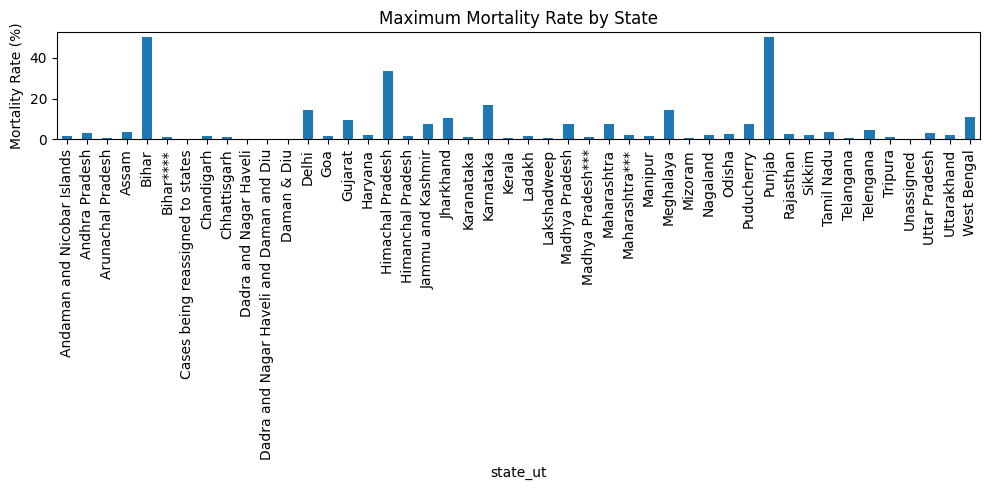

In [26]:

# Mortality Rate Distribution
plt.figure(figsize=(10, 5))
df.groupby('state_ut')['mortality_rate'].max().plot(kind='bar')
plt.title('Maximum Mortality Rate by State')
plt.ylabel('Mortality Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


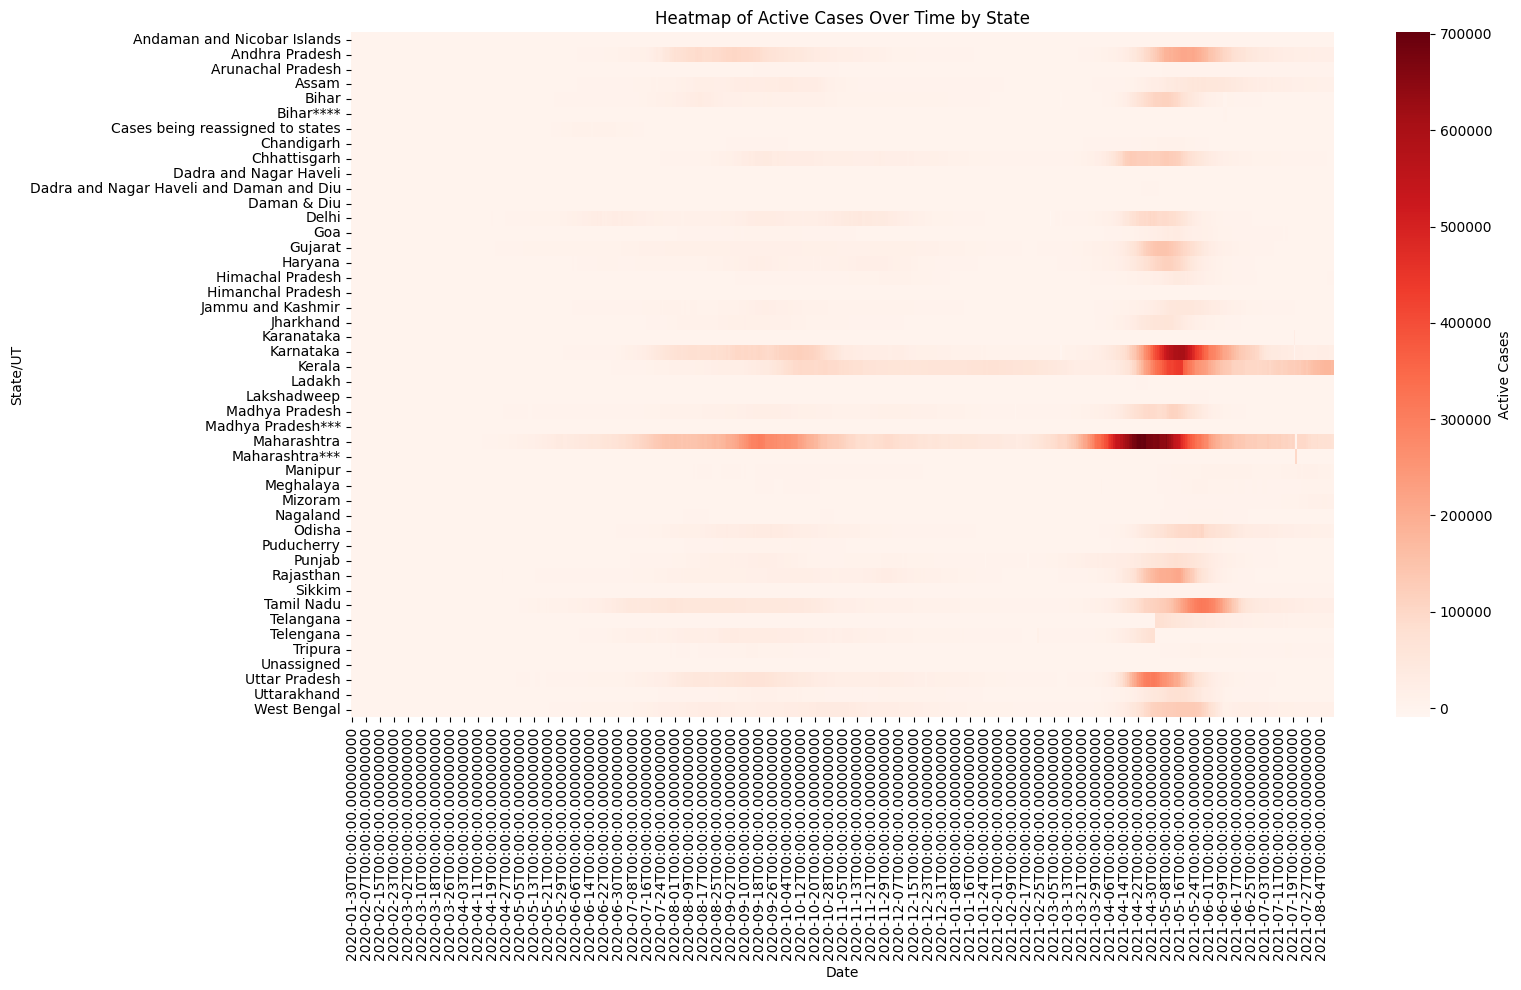

In [27]:

# Heatmap of Active Cases by State and Date
import seaborn as sns

heatmap_data = df.pivot_table(index='state_ut', columns='date', values='active_cases', aggfunc='max').fillna(0)
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="Reds", cbar_kws={'label': 'Active Cases'})
plt.title("Heatmap of Active Cases Over Time by State")
plt.xlabel("Date")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


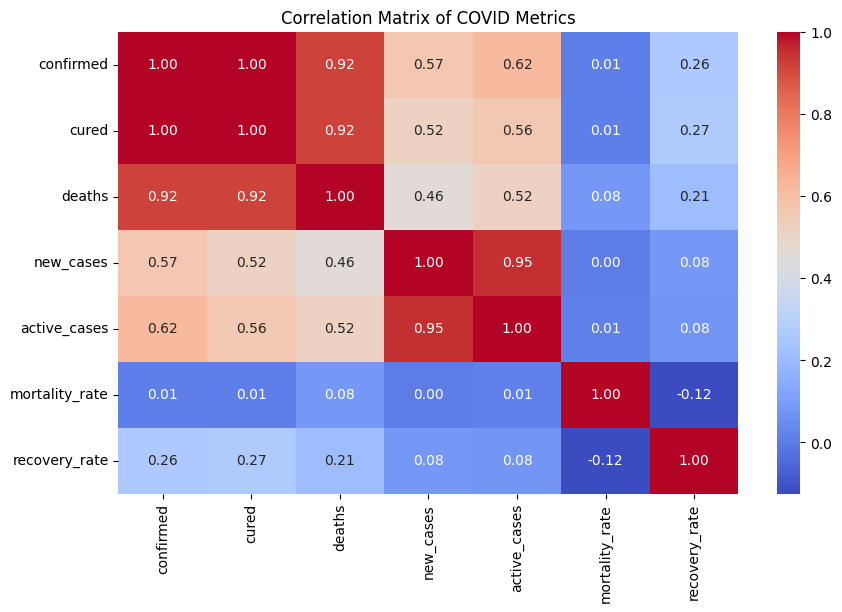

In [28]:

# Correlation Matrix
numeric_cols = ['confirmed', 'cured', 'deaths', 'new_cases', 'active_cases', 'mortality_rate', 'recovery_rate']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of COVID Metrics")
plt.show()
